In [89]:
#!pip install psycopg2

In [90]:
import psycopg2
import pandas as pd
import numpy as np
import csv

### verify the conexion
try:
    # Connect to the database
    conn = psycopg2.connect(
        host="pg.ujueta.com",
        port="5432",
        user="consultoria",
        password="LmKTXJBXya!14]f9!2k]",
        database="postgres",
    )
except psycopg2.Error as e:
    print("Error connecting to the database:")
    print(e)
else:
    print("Connection established successfully")

Connection established successfully


In [ ]:

### ventas diario apiladas
def export_forecast_to_csv():
    try:
        # connect to the database
        conn = psycopg2.connect(
            host="pg.ujueta.com",
            port="5432",
            user="consultoria",
            password="LmKTXJBXya!14]f9!2k]",
            database="postgres",
        )

        # create cursor
        with conn.cursor() as cur:

            # ececute a sql query

            cur.execute("""SELECT * 
                           FROM forecast.ventas_diario 
                           WHERE docdate BETWEEN '2015-01-01' AND '2024-11-30' 
                                AND codigo_articulo IN ('MAEL2G100',	'SOELSI7200XP',	'SOFUFW181',	'SOELSI6140DV',	'SOELSI8180MP',	'SOELSI7160XP',	'HEFUFCD21',	'SOFUFW205CEL',	'SOELSI7130MP',
                                                        'MAEL2G65',	'SOSWSWW2060N',	'HEELCA1024S',	'SOSWSWA2040N',	'AUACEG250',	'SOSWSWA2650',	'AUACSH1000',	'HEELPW2275',	'HEELPW1565',
                                                        'MADUDG701',	'SOFUFW33',	'SOFUFW121',	'AUACPB400',	'SOSWSWP3060',	'HEELBM3514',	'SOELKITSI7160XP',	'AUACBD850',	'SOFUFW125',
                                                        'SOELSI8300MG',	'HEELXID20',	'HEELDH164515',	'HEFUFCD12KIT',	'MAEL2G40',	'SOFUFW185',	'SOELSI9220DV',	'SOELSI7175XP',	'MAEL2G25',
                                                        'AUACRIM4F',	'SOFUFW257',	'MAEL2G13',	'AUACAN4275',	'AUACRP120',	'SOELSI9250DV',	'HEELPW1770',	'SOFUFW161M',	'SOELSI9180DV',
                                                        'HEELCA2542D',	'MAEL2G10I',	'SOFUFW255P',	'SOFUFW35',	'HEELAG1165',	'SOELSI9220MP',	'SOSWSWA2057',	'SOSWSWA153N',	'HEFUFG71',
                                                        'HEELAG1420',	'AUACMTD624',	'AUELMC3',	'SOFUFW81',	'SOSWSWC690',	'AUACV515',	'AUACFC350',	'HEELCA1012D',	'HEELAG1141',
                                                        'HEELPW2482',	'HEELRM9026',	'AUACALS4',	'SOELCSVM501',	'SOFUFW83',	'SOELCSVM530',	'HEELCA5035',	'AUELMC5',	'AUACSC901',
                                                        'SOSWM1-111',	'SOELSI9300DV',	'HEELCA6205',	'SOSWSWC440N',	'HEFUFC25',	'HEELTA750',	'SOELSI9210DT',	'HEELTB500',	'HEELAG1142KIT',
                                                        'HEELVC0115P',	'AUACEG500',	'HEELBM5016',	'AUELMC12',	'SOFUFW131M',	'AUACALM4',	'AUACAT42',	'HEFUFHG18',	'HEFUFD52',
                                                        'SOSWM3-315',	'SOELSI7150DV',	'AUACBD1100',	'SOELSI8225AL',	'SOSWC1-811',	'SOELCSVM510',	'SOELSI6200MDV',	'HEELAG114',	'HEELXIW20',
                                                        'SOSWSWA2850',	'HEELCA6256',	'MAEL2G80',	'HEELEB7056',	'SOELAT2610254M',	'SOSWSWT2045',	'SOELSI6160MDV',	'HEELTA1500',	'HEELXBEA20',
                                                        'HEELEP181',	'AUACBD1522',	'AUELME611',	'MAEL2G950',	'HEELCA1510',	'AUACAE30',	'HEELCHS16',	'HEELXAG20',	'SOSWM3-215',
                                                        'HEELXBTP20',	'HEELDH7531',	'SOFUFW23',	'SOELCSVM760',	'SOELSIC40DV',	'HEELVC0640P',	'SOSWC1-651',	'AUACAT63',	'HEFUFCD10',
                                                        'MADUDG301-A',	'AUACOWL608',	'SOELRAFC209',	'HEELTA375',	'HEFUFCS2511',	'AUACALR4',	'SOSWSWA3250',	'MAELGPW2515',	'HEELHG1600',
                                                        'HEELTA550',	'HEELEB90758',	'AUELME624DC',	'HEELCS1425',	'SOSWM3-325',	'SOSWC1-611',	'HEFUFRM13030',	'SOELRAFC208',	'HEELVC2525P',
                                                        'AUELPA42',	'SOELCSVM750',	'HEELTA1100',	'AUACFENIX600',	'HEELAG230',	'HEELPS350',	'HEELMS1018',	'SOSWSWW2550',	'HEELDH1506',
                                                        'AUACHULK750',	'AUACFC351',	'AUACDG1224',	'AUACRIM4Z',	'SOFUFW50',	'SOSWT1-111',	'SOSWG1-110',	'SOELSI8225XP',	'AUACSC1800',
                                                        'HEFUFDH1320',	'HEELXID19',	'HEELSP500',	'AUACKH55K',	'AUACHULK950',	'SOELPES6300',	'HEELBV06',	'HEELVC0535P',	'SOSWSWW4070MV',
                                                        'SOSWP2-517',	'HEELRT1512',	'HEELRM7024',	'AUELCR433',	'AUACBOOM06T',	'SOSWSWT2035',	'AUACALH2',	'HEELID600',	'AUELSL5500L',
                                                        'MADUDG23I',	'AUACFX1000',	'HEELRM2604',	'HEELMS1021S',	'SOSWG1-114',	'SOSWSWW2760',	'SOSWM3-225',	'HEELPS250',	'HEFUFRM7024',
                                                        'AUELME811',	'HEELBV05',	'SOSWSWC1000',	'HEELDH4515',	'HEELTS255',	'HEELAG181',	'SOSWP1-440',	'SOELAT2635504M',	'SOSWM3-317',
                                                        'SOSWC1-669',	'SOSWSWT2033',	'HEFUFC124S',	'AUACAR200',	'HEELBV04',	'AUACOWL504',	'SOELSI9500MP',	'MADUDG123-A',	'SOSWM3-327',
                                                        'SOELPMS6505',	'HEELMT180KIT',	'AUACAH45',	'HEELDH2810',	'AUACHULK450',	'AUACKH70K',	'AUACAR380',	'AUACKH60K',	'AUACAC24NE',
                                                        'AUELEP100240',	'AUACHR42',	'HEELRM4210',	'HEFUFC112S',	'SOSWG2-213',	'SOSWSWW3552',	'AUAC265',	'AUACOP3090W',	'AUACEL12',
                                                        'SOSWG1-111',	'HEELAIRKIT5',	'HEELRM3209',	'AUACKH120K',	'HEELJS750',	'HEFUFPS25',	'AUACRT2415U',	'SOSWG2-214',	'SOSWC1-620',
                                                        'SOELCSVM830',	'AUACEG501',	'SOSWP2-513',	'HEELCS1427',	'AUELSL3000L',	'AUACFENIX601',	'AUACIN624',	'SOSWC1-941',	'AUACSPRING60R',
                                                        'AUACAE20',	'AUACAF24Li',	'SOSWC1-931',	'SOSWSWW5070MV',	'AUACAVANTI6000Z',	'SOSWP2-516',	'AUACAL3900U',	'AUELSL5000',	'AUELCR4301',
                                                        'AUACKCP200C',	'AUACMTD224',	'AUACSPRING70R',	'AUACKCP850R',	'SOSWG2-210',	'AUACSPRING60L',	'AUACKCP300C',	'AUACSPRING80R',	'AUACSPRING55R',
                                                        'AUACFL85265',	'AUACKCP501R',	'HEELRD1390',	'SOSWT1-115',	'AUACKCP801R',	'AUACKH160K',	'AUACKCP451C',	'SOSWP2-514',	'HEELXB0420',
                                                        'SOSWC1-921',	'SOELCSVM820',	'AUACHULK1500',	'AUACAE15',	'AUACBL05',	'SOSWM3-316',	'SOELSIC45DVP',	'HEFUBFCD21',	'AUACKCP950R',
                                                        'SOSWM1-125',	'MADUDG121-A',	'SOSWP1-330',	'HEFUFBD2110',	'SOSWP2-511',	'AUACKCP875R',	'AUACKH100K',	'AUACSPRING80L',	'AUACHULK400S',
                                                        'AUACKCP900R',	'AUACSPRING70L',	'AUACKH80K',	'AUACRT3FX',	'AUACKCP551R',	'AUACSPRING50R',	'AUACKCP376R',	'MAELMSG235S',	'SOSWG1-112',
                                                        'AUACKCP250R',	'AUACKH140K',	'HEELCINPU30410',	'AUACGC02',	'AUACKCP251C',	'AUELEE16',	'AUACMN20',	'AUACKCP975R',	'AUACKCP491R',
                                                        'HEFUFAG21B',	'AUACAR10SH',	'HEELXB0220',	'HEFUFID21B',	'SOSWP2-518',	'SOSWP2-520',	'AUACAE25',	'AUACBOOM04F',	'AUACVIPER100',
                                                        'SOSWP2-515',	'SOSWP2-411',	'SOSWP1-340',	'HEFUFCD12',	'AUACAC24NE500',	'AUACAC24NE600',	'AUACKCP575R',	'AUACSPRING50L',	'SOSWT1-112',
                                                        'AUACRC4SC',	'SOSWM1-114',	'HEELCINPA30410',	'HEELAIRKIT20',	'AUACRCBLT3',	'AUACKCP301R',	'AUAC4010',	'AUACSPRING55L',	'AUACRT4SC',
                                                        'SOSWM2-254',	'AUACKCP375C',	'AUACSPRING45R',	'SOSWM1-135',	'AUACKCP201R',	'AUACSPRING45L',	'MADUDG401I',	'AUACKCP450R',	'SOSWM1-117',
                                                        'HEELEBA11450',	'AUACKCP490C',	'SOSWC6-603',	'SOSWG2-211',	'SOSWP2-410',	'HEFUFTS2010',	'AUACSPRING35L',	'AUACSPRING35R',	'AUACCRAB03',
                                                        'HEFUCBFCD21',	'SOSWM2-251',	'SOSWPMSW02',	'AUACCRAB02',	'HEELEBA111630',	'HEELEBA3450',	'AUACKCP401R',	'HEELXB0520',	'AUACAR10SC901',
                                                        'HEELEBA5850',	'SOSWSWC1050MV',	'AUACKCP400C',	'AUACKCP350C',	'HEELEBA91630',	'AUACAP40',	'SOSWM3-323',	'SOSWM2-211',	'SOSWM3-326',
                                                        'SOSWP2-412',	'AUACSLB220',	'AUACAR10',	'HEELEBA1250',	'AUAC3-4-1',	'HEELEBA3430',	'SOSWP2-417',	'HEELEBA131630',	'HEELEBA1230',
                                                        'HEELID710',	'SOSWP2-414',	'AUACKCP351R',	'HEFUBFCD12',	'HEELEBA150',	'HEELEBA7850',	'HEELEBA5830',	'HEELEBA11850',	'SOSWC8-805',
                                                        'HEELID850',	'SOSWP2-512',	'AUACBOOM02',	'HEELEBA13850',	'HEELEBA7830',	'SOSWG2-217',	'AUACLD500',	'HEELEBA130',	'SOFUFWA4012',
                                                        'SOFUFW405',	'SOSWM3-313',	'AUACACCESSCAM',	'SOSWP2-510',	'SOSWG3-313',	'AUACCH1',	'SOELCSVM551',	'AUACSB9',	'AUACAF31C',
                                                        'HEELRM13030',	'SOFUFWA4013',	'HEELXCB20',	'SOSWM2-235',	'SOSWP2-409',	'SOSWC6-604',	'SOSWP2-413',	'AUACFS05',	'AUACSB4',
                                                        'SOSWM2-252',	'SOSWM2-265',	'SOSWM2-245',	'SOSWM2-272',	'SOSWP2-418',	'SOFUFWA4014',	'SOSWM1-113',	'SOSWM2-237',	'SOSWG3-311',
                                                        'AUACALK4',	'SOSWM2-311',	'HEFUCBFCD12',	'AUACKSH20',	'HEELXBLI20',	'SOSWG2-216',	'SOSWP2-427',	'SOSWP2-425',	'HEELEPBA634L',
                                                        'HEELEPBA634C',	'SOSWM2-215',	'SOSWM2-214',	'SOSWG3-314',	'SOSWM2-212',	'AUACFEX10',	'SOELRSF0810A',	'SOELRSF1012',	'SOSWP2-421',
                                                        'SOELREPSI8250MG-R12',	'SOELRSS0910A',	'SOELCSVM501IP',	'SOSWG3-316',	'SOSWM2-236',	'SOELRSS0608B',	'SOELRSS1012B',	'SOELRSF0810B',	'SOSWP2-420',
                                                        'SOELRSS0910B',	'SOSWM2-246',	'SOSWG3-312',	'SOSWP2-424',	'SOSWM2-312',	'SOSWM2-321',	'SOSWM2-210',	'SOSWM2-320',	'SOELRSA1012',
                                                        'SOSWM2-328',	'SOELRSS0608A',	'SOSWM2-257',	'SOSWM2-324',	'SOSWM2-325',	'SOSWM2-238',	'SOSWM2-217',	'SOSWM2-218',	'SOSWM2-229')
                            """)                           
            # fetch the results
            results = cur.fetchall()

            # open a file in the downloads folder

            with open(
                r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\input_high.csv",
                #"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/input_high.csv",
                "w",
                newline="",
            ) as f:
                # create a csv writer
                writer = csv.writer(f)

                # write the column names
                writer.writerow([col[0] for col in cur.description])

                # write the query results
                writer.writerows(results)
    except Exception as e:
        print(f"An error ocurred: {e}")
    finally:
        # close the cursor and connection
        if conn:
            conn.close()


# Call the function to export data to csv
export_forecast_to_csv()


In [92]:
### manipulate data

import pandas as pd

# carga de datas
data = pd.read_csv(
    r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\input_high.csv"
    #"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/input_high.csv"
)
# convertir en dataframe
df = pd.DataFrame(data)
df.head()

,docdate,codigo_articulo,cantidad
0,2022-01-03,AUACALR4,1
1,2022-01-03,AUACCH1,5
2,2022-01-03,AUACPB400,1
3,2022-01-03,AUACRIM4F,5
4,2022-01-03,AUACSH1000,3


In [93]:
import pandas as pd

def sumarizar_a_mensual(df, fecha_col, suma_col, agrupar_por=None):
    """
    Función para sumarizar datos diarios a un nivel mensual.

    Parámetros:
    ----------
    df : pd.DataFrame
        El DataFrame de entrada con los datos a procesar.
    fecha_col : str
        Nombre de la columna que contiene las fechas.
    suma_col : str
        Nombre de la columna cuyos valores se desean sumarizar.
    agrupar_por : list, optional
        Lista de columnas adicionales para agrupar (por defecto es None).
    
    Retorna:
    -------
    pd.DataFrame
        DataFrame con los datos agregados a nivel mensual.
    """
    # Asegurar que la columna de fecha esté en formato datetime
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    
    # Filtrar filas con fechas válidas
    df = df.dropna(subset=[fecha_col])
    
    # Crear la clave de agrupación mensual
    df['mes_inicio'] = df[fecha_col].dt.to_period('M').dt.to_timestamp()

    # Configurar las columnas para agrupar
    group_cols = ['mes_inicio'] + (agrupar_por if agrupar_por else [])

    # Realizar la agrupación y sumarización
    resultado = (
        df.groupby(group_cols, as_index=False)[suma_col]
        .sum()
    )

    return resultado


In [94]:
df_m_0 = sumarizar_a_mensual(filtered_df, 
    fecha_col='docdate', 
    suma_col= 'cantidad', 
    agrupar_por=['codigo_articulo']
)
print(df_m_0)

    mes_inicio codigo_articulo  cantidad
0   2022-01-01        AUACAE30        52
1   2022-01-01       AUACPB400        42
2   2022-01-01       AUACRIM4F       756
3   2022-01-01      AUACSH1000       166
4   2022-01-01      HEELAG1141       370
..         ...             ...       ...
665 2024-11-01       SOFUFW181      1119
666 2024-11-01       SOFUFW185        77
667 2024-11-01        SOFUFW33      1553
668 2024-11-01        SOFUFW35       393
669 2024-11-01      SOSWP2-517       646

[670 rows x 3 columns]


In [95]:
# List of SKUs to filter
selected_skus = [
    'AUACAE30', 'AUACPB400', 'AUACRIM4F', 'AUACSH1000', 'HEELAG1141',
    'HEELAG1142KIT', 'HEELPW1770', 'HEELXID20', 'HEFUFCD12KIT',
    'HEFUFCD21', 'HEFUFD52', 'HEFUFG71', 'SOELCSVM501', 'SOELCSVM530',
    'SOELSI6140DV', 'SOFUFW181', 'SOFUFW185', 'SOFUFW33', 'SOFUFW35',
    'SOSWP2-517'
]

# Filter the dataset
filtered_df = df_m_0[df_m_0['codigo_articulo'].isin(selected_skus)]
filtered_df.rename(columns={'mes_inicio': 'docdate'}, inplace=True)

In [96]:
print(filtered_df)

       docdate codigo_articulo  cantidad
0   2022-01-01        AUACAE30        52
1   2022-01-01       AUACPB400        42
2   2022-01-01       AUACRIM4F       756
3   2022-01-01      AUACSH1000       166
4   2022-01-01      HEELAG1141       370
..         ...             ...       ...
665 2024-11-01       SOFUFW181      1119
666 2024-11-01       SOFUFW185        77
667 2024-11-01        SOFUFW33      1553
668 2024-11-01        SOFUFW35       393
669 2024-11-01      SOSWP2-517       646

[670 rows x 3 columns]


In [97]:
data_highdda = filtered_df.copy() 
data_highdda

,docdate,codigo_articulo,cantidad
0,2022-01-01,AUACAE30,52
1,2022-01-01,AUACPB400,42
2,2022-01-01,AUACRIM4F,756
3,2022-01-01,AUACSH1000,166
4,2022-01-01,HEELAG1141,370
...,...,...,...
665,2024-11-01,SOFUFW181,1119
666,2024-11-01,SOFUFW185,77
667,2024-11-01,SOFUFW33,1553
668,2024-11-01,SOFUFW35,393


In [98]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_m = data_sf(data_highdda, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_m
df_m.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         670 non-null    datetime64[ns]
 1   y          670 non-null    int64         
 2   unique_id  670 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 15.8+ KB


In [99]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive

from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    Naive,
    SeasonalNaive,
    Theta,
    WindowAverage,
    Holt,
    CrostonOptimized,
)

#-- Parametros

# Número de días en el futuro a pronosticar
horizon = 3
# Ventana estacional: es 12 porque tenemos datos son mensuales
season_length = 12
# El número de dias que el modelo usará para hacer el forecast 
window_size = 3

# Lista de modelos a evaluar
models = [
    AutoARIMA(season_length=season_length),
    #AutoETS(season_length=season_length),
    HoltWinters(season_length=season_length),
    # ADIDA(),
    # Croston(),
    # IMAPA(),
    # TSB(alpha_d = 0.2, alpha_p = 0.2),
    # HistoricAverage(),
    DOT(season_length=season_length),
    # Naive(),
    SeasonalNaive(season_length=season_length),
    # Theta(),
    #WindowAverage(window_size=3) #,  # Adjust `window_size` as needed
    Holt() #,
    #CrostonOptimized()
]

In [100]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='MS', #MS
    n_jobs=-1,
)


In [101]:
# Cross Validation
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape

crossvaldation_df = sf.cross_validation(
    df=df_m,
    h=horizon,
    step_size=horizon,
    n_windows=1
)



C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [102]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head(22)

,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt,best_model
unique_id,,,,,,
AUACAE30,0.227394,0.136554,0.215470,0.243222,0.162563,HoltWinters
AUACPB400,0.192084,0.182533,0.183260,0.272049,0.121506,Holt
AUACRIM4F,0.207259,0.421898,0.178811,0.626848,0.083422,Holt
AUACSH1000,0.418822,0.469738,0.091592,0.418822,0.051868,Holt
HEELAG1141,0.447425,0.589598,0.447585,0.542680,0.501202,AutoARIMA
HEELAG1142KIT,0.622291,0.606898,0.621961,0.613674,0.612033,HoltWinters
HEELPW1770,0.250242,0.392103,0.277496,0.448213,0.344456,AutoARIMA
HEELXID20,0.350715,0.491676,0.310068,0.351313,0.274058,Holt
HEFUFCD12KIT,0.082937,0.283949,0.100581,0.322891,0.098448,AutoARIMA


In [103]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=3, 
                      ## level=[90]
                     )
fcst_df.head()

C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt
unique_id,,,,,,
AUACAE30,2024-12-01,151.488220,247.650269,155.329025,136.0,174.133392
AUACAE30,2025-01-01,151.370224,139.045380,155.329025,144.0,176.218445
AUACAE30,2025-02-01,151.252319,112.745049,155.329025,136.0,178.303482
AUACPB400,2024-12-01,128.946915,103.438408,117.282776,158.0,131.503952
AUACPB400,2025-01-01,128.946915,143.979782,117.282776,86.0,132.976624


In [104]:
#-- Revisión para eliminar pornosticos constantes
fcst_df.reset_index(drop=False).groupby(['unique_id']).std()

,ds,AutoARIMA,HoltWinters,DynamicOptimizedTheta,SeasonalNaive,Holt
unique_id,,,,,,
AUACAE30,31 days,0.117950,71.514740,0.000000,4.618802,2.085045
AUACPB400,31 days,0.000000,27.381657,0.000000,36.166283,1.472672
AUACRIM4F,31 days,1.715881,88.032135,0.000000,156.481094,70.697998
AUACSH1000,31 days,0.000046,57.309788,0.000000,71.042244,2.083839
HEELAG1141,31 days,0.571564,54.126919,0.663737,61.076454,7.192596
HEELAG1142KIT,31 days,0.000153,89.376503,0.000000,25.865034,6.875000
HEELPW1770,31 days,80.374168,77.480133,0.456754,217.736847,3.535706
HEELXID20,31 days,16.822172,60.040245,0.000000,63.316666,12.303932
HEFUFCD12KIT,31 days,51.908119,75.182594,0.000000,248.568573,59.844574


C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


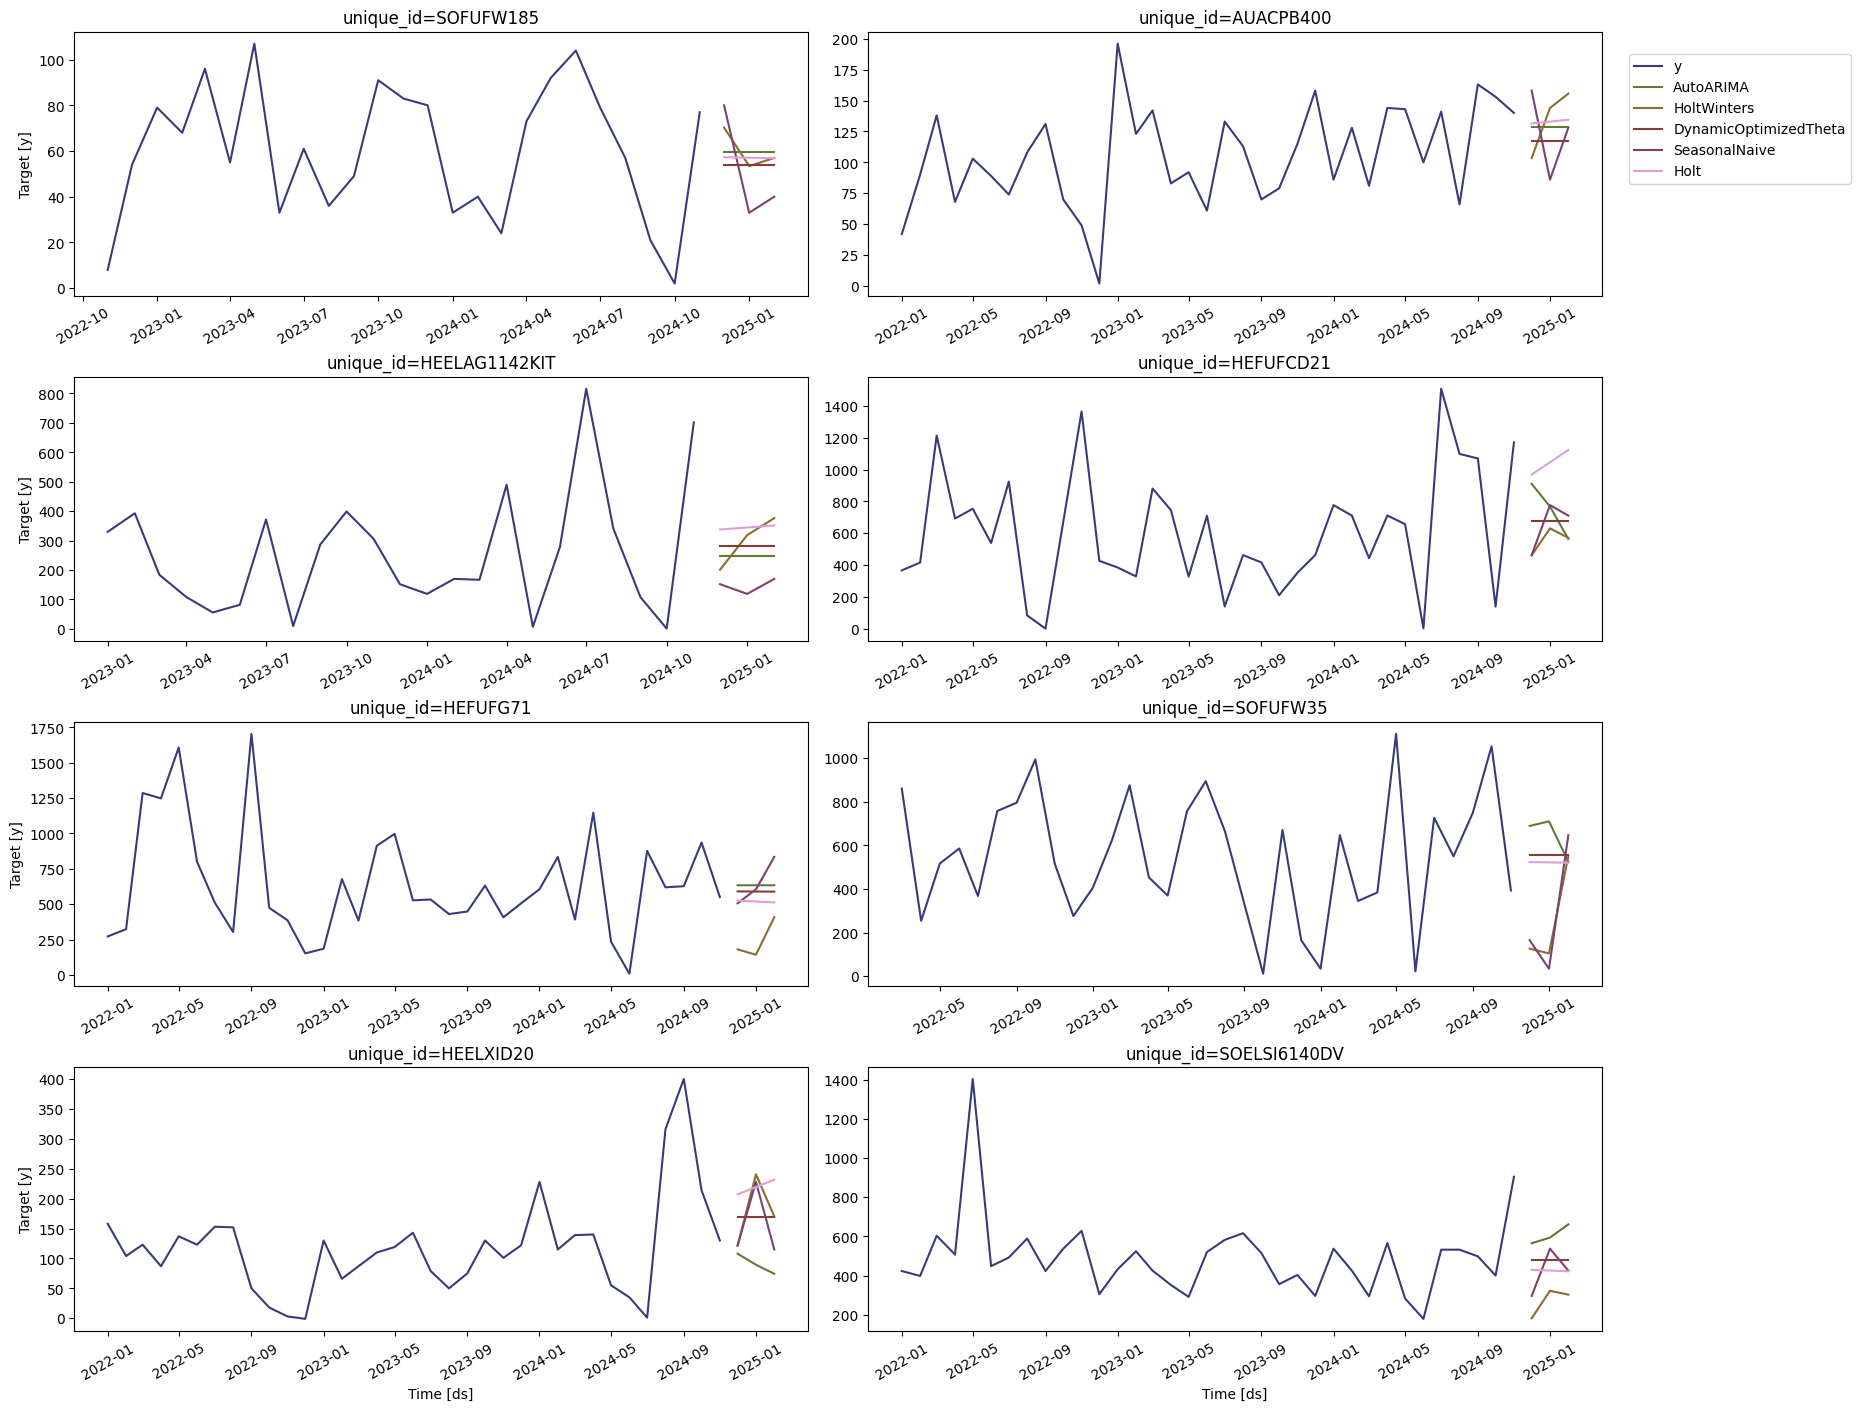

In [105]:
sf.plot(df_m,fcst_df)

In [106]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    # Clean and standardize column names
    forecasts_df.columns = forecasts_df.columns.str.strip().str.lower()
    evaluation_df['best_model'] = evaluation_df['best_model'].str.strip().str.lower()
    
    # Reset index to ensure 'unique_id' is a column
    forecasts_df = forecasts_df.reset_index()
    
    # Merge evaluation_df with forecasts_df
    merged_df = evaluation_df.merge(forecasts_df, on='unique_id', how='left')
    
    rows = []
    for _, row in merged_df.iterrows():
        best_model = row['best_model']
        
        # Validate best_model column
        if best_model not in forecasts_df.columns:
            raise KeyError(f"Model '{best_model}' not found in forecasts_df columns: {forecasts_df.columns.tolist()}")
        
        # Append the forecast value for the best model
        rows.append({'unique_id': row['unique_id'], 'ds': row['ds'], 'best_model': row[best_model]})
    
    # Convert to a dataframe
    result_df = pd.DataFrame(rows)
    return result_df

# Example usage
prod_forecasts_df = get_best_model_forecast(forecasts_df=fcst_df, evaluation_df=evaluation_df)
prod_forecasts_df['best_model'] = np.where(prod_forecasts_df['best_model']<0, 0, prod_forecasts_df['best_model'].round())
prod_forecasts_df

,unique_id,ds,best_model
0,AUACAE30,2024-12-01,248.0
1,AUACAE30,2025-01-01,139.0
2,AUACAE30,2025-02-01,113.0
3,AUACPB400,2024-12-01,132.0
4,AUACPB400,2025-01-01,133.0
5,AUACPB400,2025-02-01,134.0
6,AUACRIM4F,2024-12-01,1423.0
7,AUACRIM4F,2025-01-01,1494.0
8,AUACRIM4F,2025-02-01,1564.0
9,AUACSH1000,2024-12-01,239.0


In [107]:
# Usar la función de agregación mensual

prod_forecasts_df_m = sumarizar_a_mensual(prod_forecasts_df, 
    fecha_col='ds', 
    suma_col='best_model', 
    agrupar_por=['unique_id']
)
print(prod_forecasts_df_m)

   mes_inicio      unique_id  best_model
0  2024-12-01       AUACAE30       248.0
1  2024-12-01      AUACPB400       132.0
2  2024-12-01      AUACRIM4F      1423.0
3  2024-12-01     AUACSH1000       239.0
4  2024-12-01     HEELAG1141       348.0
5  2024-12-01  HEELAG1142KIT       201.0
6  2024-12-01     HEELPW1770       261.0
7  2024-12-01      HEELXID20       207.0
8  2024-12-01   HEFUFCD12KIT       613.0
9  2024-12-01      HEFUFCD21       461.0
10 2024-12-01       HEFUFD52       146.0
11 2024-12-01       HEFUFG71       634.0
12 2024-12-01    SOELCSVM501       230.0
13 2024-12-01    SOELCSVM530       193.0
14 2024-12-01   SOELSI6140DV       296.0
15 2024-12-01      SOFUFW181      1017.0
16 2024-12-01      SOFUFW185        80.0
17 2024-12-01       SOFUFW33      1080.0
18 2024-12-01       SOFUFW35       558.0
19 2024-12-01     SOSWP2-517       444.0
20 2025-01-01       AUACAE30       139.0
21 2025-01-01      AUACPB400       133.0
22 2025-01-01      AUACRIM4F      1494.0
23 2025-01-01   

In [108]:
prod_forecasts_df_m.to_excel("../output_Mensual_DemandHigh_08122024.xlsx", sheet_name='PronosticoMensual')